In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(4040, 2)

In [3]:
df

,Time,domain
0,2021-03-23 21:07:12,www.cmu.edu
1,2021-03-23 21:07:10,github.com
2,2021-03-23 21:07:10,raw.githubusercontent.com
3,2021-03-23 20:58:06,github.com
4,2021-03-23 20:57:56,github.com
...,...,...
4035,2021-02-20 19:47:44,webauth.umbc.edu
4036,2021-02-20 19:47:44,webauth.umbc.edu
4037,2021-02-20 13:30:17,www.google.com
4038,2021-02-17 17:02:42,my.umbc.edu


In [4]:
df.tail()

,Time,domain
4035,2021-02-20 19:47:44,webauth.umbc.edu
4036,2021-02-20 19:47:44,webauth.umbc.edu
4037,2021-02-20 13:30:17,www.google.com
4038,2021-02-17 17:02:42,my.umbc.edu
4039,2021-02-17 16:59:58,www.google.com


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.google.com                      538
webauth.umbc.edu                    405
mail.google.com                     295
www.udemy.com                       219
github.com                          145
blackboard.umbc.edu                 128
my.umbc.edu                         105
www.javatpoint.com                   98
piazza.com                           95
my3.my.umbc.edu                      91
csprd-web.ps.umbc.edu                82
www.w3schools.com                    80
www.youtube.com                      79
www.kaggle.com                       72
www.linkedin.com                     66
www.hackerrank.com                   61
umbc.app.box.com                     59
umbc-csm.symplicity.com              49
lucid.app                            45
calendar.google.com                  41
stackoverflow.com                    40
www.theforage.com                    36
zoom.us                              34
umbc.academicworks.com               31
www.googleadservices.com             29


<AxesSubplot:>

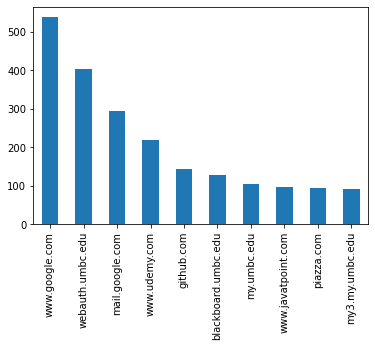

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     146
1      23
6       7
7       5
8      35
9      73
10    219
11    218
12    241
13    378
14    262
15    360
16    291
17    311
18    202
19    270
20    209
21    173
22    254
23    363
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

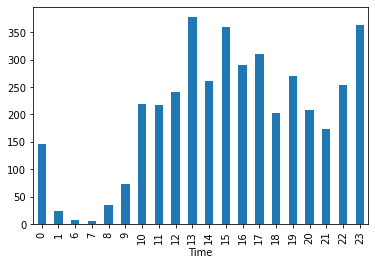

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-03-23 21:07:12,www.cmu.edu,Tuesday,1
1,2021-03-23 21:07:10,github.com,Tuesday,1
2,2021-03-23 21:07:10,raw.githubusercontent.com,Tuesday,1
3,2021-03-23 20:58:06,github.com,Tuesday,1
4,2021-03-23 20:57:56,github.com,Tuesday,1


In [14]:
df['Day'].value_counts()

Monday       1023
Friday        674
Tuesday       601
Saturday      584
Sunday        478
Wednesday     343
Thursday      337
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1023
1     601
2     343
3     337
4     674
5     584
6     478
Name: DayIndex, dtype: int64

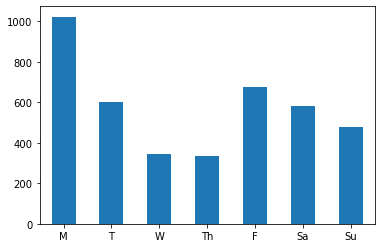

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-03-23 21:07:12,www.cmu.edu,Tuesday,1,False
1,2021-03-23 21:07:10,github.com,Tuesday,1,False
2,2021-03-23 21:07:10,raw.githubusercontent.com,Tuesday,1,False
3,2021-03-23 20:58:06,github.com,Tuesday,1,False
4,2021-03-23 20:57:56,github.com,Tuesday,1,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
587,2021-03-21 23:35:10,gizmodo.com,Sunday,6,True
588,2021-03-21 23:35:09,gizmodo.com,Sunday,6,True
589,2021-03-21 23:29:44,blackboard.umbc.edu,Sunday,6,True
590,2021-03-21 23:29:39,blackboard.umbc.edu,Sunday,6,True
591,2021-03-21 23:29:39,blackboard.umbc.edu,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

www.google.com      418
webauth.umbc.edu    294
mail.google.com     195
www.udemy.com       128
github.com          109
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

www.google.com      120
webauth.umbc.edu    111
mail.google.com     100
www.udemy.com        91
www.linkedin.com     66
Name: domain, dtype: int64

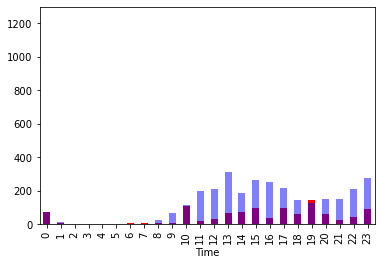

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

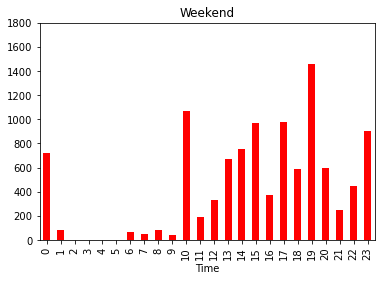

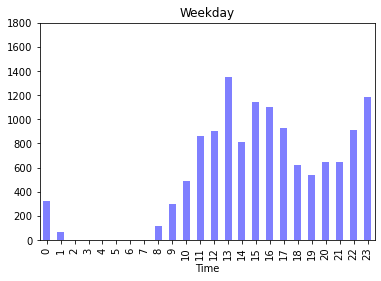

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

www.google.com                      538
webauth.umbc.edu                    405
mail.google.com                     295
www.udemy.com                       219
github.com                          145
blackboard.umbc.edu                 128
my.umbc.edu                         105
www.javatpoint.com                   98
piazza.com                           95
my3.my.umbc.edu                      91
csprd-web.ps.umbc.edu                82
www.w3schools.com                    80
www.youtube.com                      79
www.kaggle.com                       72
www.linkedin.com                     66
www.hackerrank.com                   61
umbc.app.box.com                     59
umbc-csm.symplicity.com              49
lucid.app                            45
calendar.google.com                  41
stackoverflow.com                    40
www.theforage.com                    36
zoom.us                              34
umbc.academicworks.com               31
www.googleadservices.com             29


In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

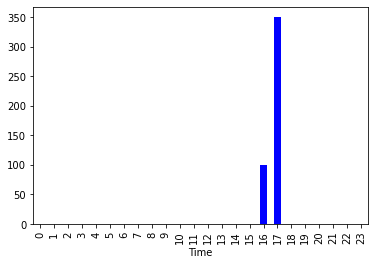

In [28]:
_= show_domain_stats('facebook', 'blue')

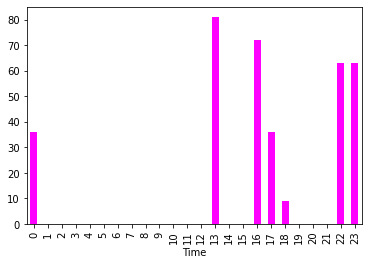

In [29]:
_ = show_domain_stats('stackover', 'magenta')


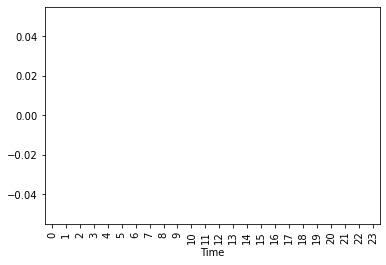

In [30]:
_ = show_domain_stats('netflix', 'red')


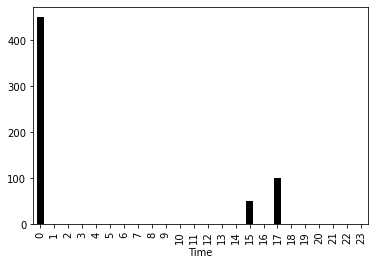

In [31]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

### Do you give permission for another student to analyze your `history_cleaned.csv`? 

(Your name will stay confidencial)

answer here

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here